# Aprendendo mais do scikit-learn

- Hoje vou estudar um fluxo de trabalho na praticaa com sklearn de ponta a ponta. [https://infoslack.pro/ml-book/contents/ml-sklearn.html]

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv("heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Agora que importamos os dados, vamos explora-los, para conhecer melhor o dataset.

In [4]:
df['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [5]:
#visualizando o target novamente mas com valores em porcentagem
df["target"].value_counts(normalize=True)


target
1    0.544554
0    0.455446
Name: proportion, dtype: float64

<Axes: xlabel='target'>

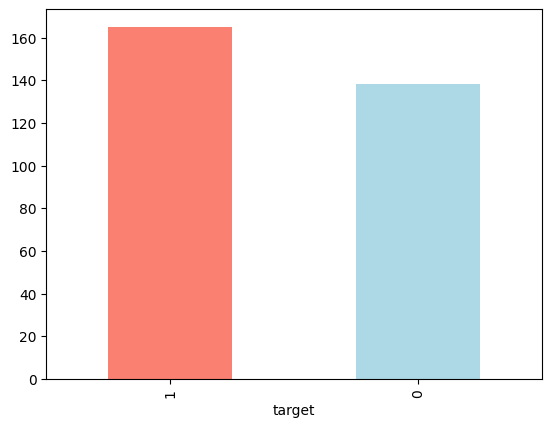

In [6]:
#mais uma vez, porem plotando esses valores
df["target"].value_counts().plot(kind="bar", color=["salmon","lightblue"])

In [7]:
#Verificando valores ausentes e os tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


todas as colunas são numericas e poucos valores são nulos

In [8]:
# vamos observar a frequencia de doenca cardiacas por sexo
pd.crosstab(df["target"],df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


72 mulheres e 93 homens tem valor positivo de presença de doença cardiaca

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

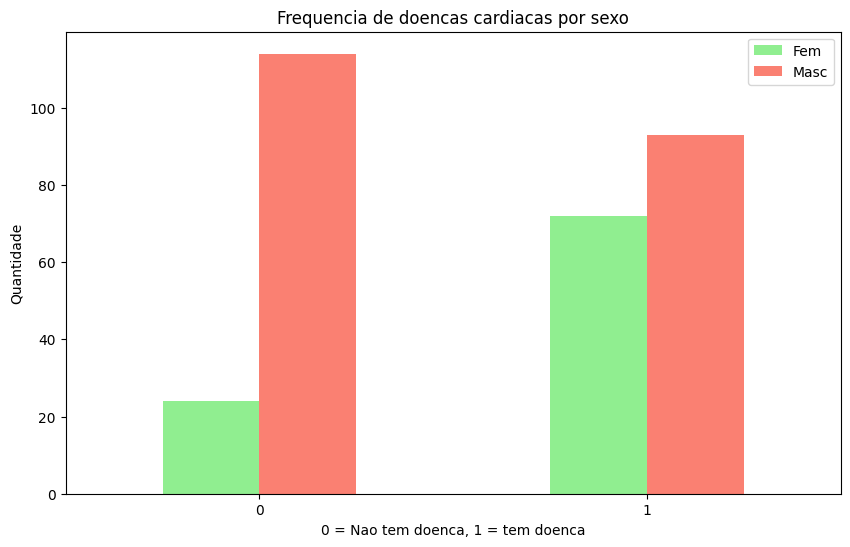

In [13]:
#plotando o exemplo do crosstab
pd.crosstab(df.target,df.sex).plot(kind='bar',figsize=(10,6),color=['lightgreen','salmon'])

plt.title("Frequencia de doencas cardiacas por sexo")
plt.xlabel("0 = Nao tem doenca, 1 = tem doenca")
plt.ylabel("Quantidade")
plt.legend(["Fem","Masc"])
plt.xticks(rotation=0)

Frequencia de doenca cardiaca por tipo de dor no peito

(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

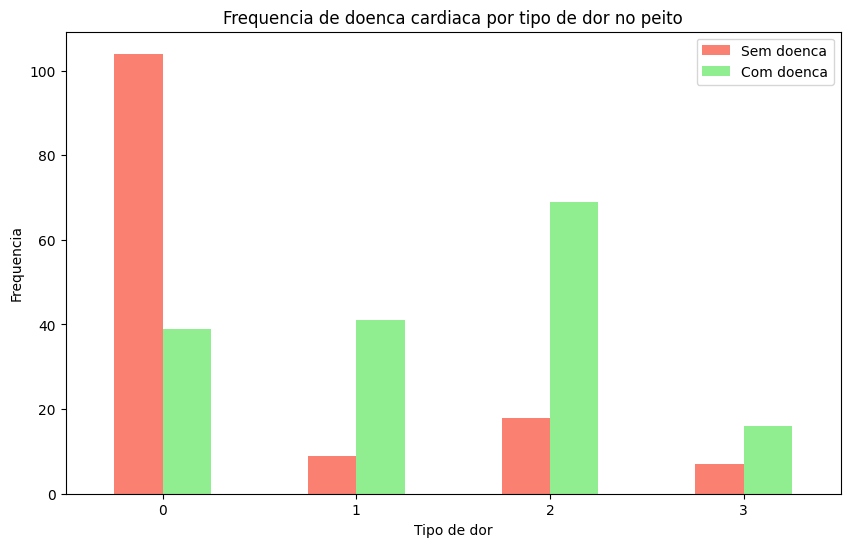

In [14]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(10,6),color=["salmon","lightgreen"])

plt.title("Frequencia de doenca cardiaca por tipo de dor no peito")
plt.xlabel("Tipo de dor")
plt.ylabel("Frequencia")
plt.legend(["Sem doenca" ,"Com doenca"])
plt.xticks(rotation=0)

cp = dor no peito

0 = dor no peito tipica

1 = dor no peito, não relacionada ao coração

2 = espasmos, não relacionados ao coração

3 = dor torácica, sem sinais de doença

### Correlação entre variaveis independentes
Por fim vamos comparar todas as variaveis independentes, isso mostrara quais variaveis em impacto na variavel alvo(target)

Um valor positivo mais alto significa um potencial para uma correlação positiva e um valor negativo mais alto, significa um potencial para uma correlação negativa.

<Axes: >

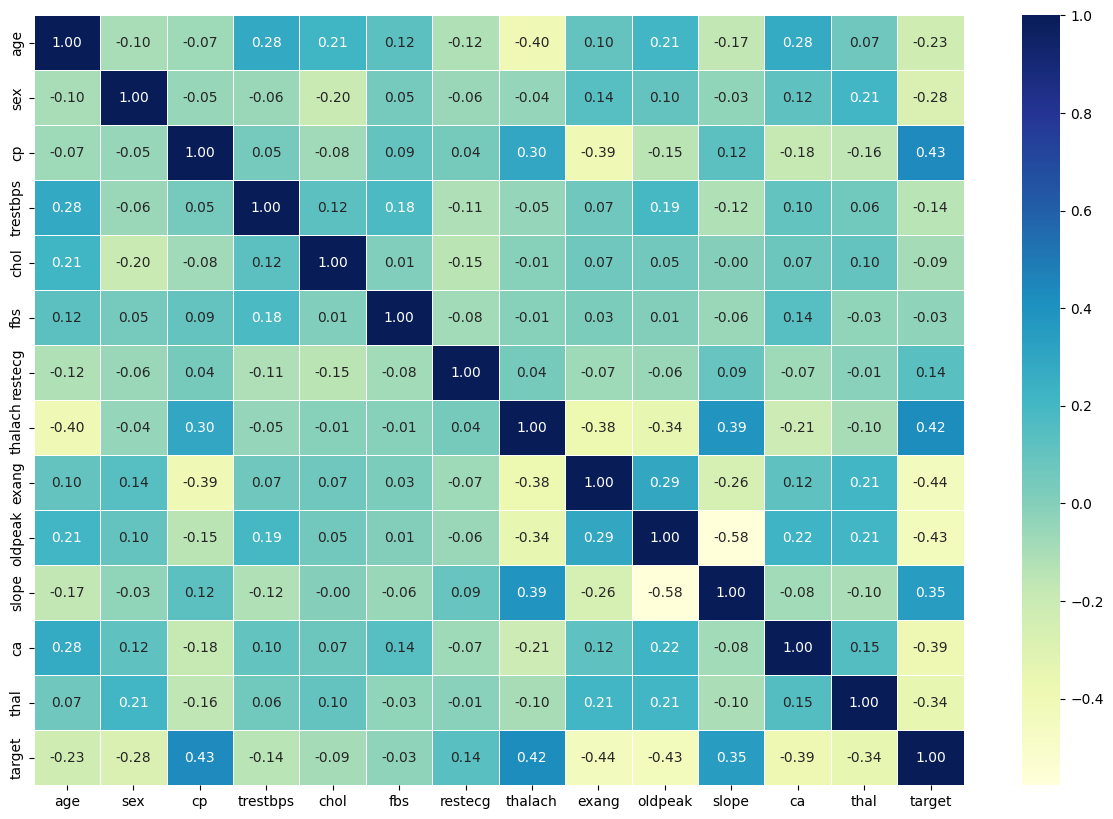

In [15]:
import seaborn as sns

corr_marix = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_marix, annot=True,linewidths=0.5, cmap='YlGnBu',fmt=".2f")

Modelagem de dados

In [19]:
# Vamos separar a variavel arget de todo o resto
X = df.drop("target", axis=1)
y = df["target"]

X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [20]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

Dividir os dados em treino e teste, com train_test_split

In [18]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

o test_size informaa para a função a porcentagem de dados que serão usados para teste, nesse caso 0.2 = 20%. Alguns problemas podem precisar de mais conjuntos de dados, por exemplo train,test and validation.

In [22]:
len(X_train),len(y_train)

(242, 242)

In [23]:
len(X_test),len(y_test)

(61, 61)

### Qual modelo escolher?

O scikit-learn disponibiliza um mapa que ajudaa a escolher o que utilizar como solução do nosso problema.(https://scikit-learn.org/stable/machine_learning_map.html)

Seguindo o mapa, o nosso problema é de classificação,vamos utilizar alguns modelos para exercitar: knn, logistc Regression and Random Florest


In [24]:
# imports
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [31]:
#Criando um dicionario que contem os modelos de ML
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestClassifier()}

def fit_and_score(models,X_train,X_test,y_train,y_test):
    model_scores = {}

    for name,model in models.items():
        model.fit(X_train,y_train)
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

In [32]:
fit_and_score(models= models,
                X_train=X_train,
                X_test=X_test,
                y_train=y_train, 
                y_test=y_test)

C:\Users\cruzd\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.6065573770491803,
 'Logistic Regression': 0.819672131147541,
 'Random Forest': 0.8032786885245902}

KNN teve o pior desempenho, Random Forest o melhor.

#### Ajustar os hiperparametros e validação cruzada
Validação cruzada = k-fold, k é o numero de subdivisões iguais e o fold é cada um dos blocos dentro de cada k

In [40]:
train_scores = []
test_scores = []

neighbors = range(1, 21) 
knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors = i)

    knn.fit(X_train, y_train)

    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [41]:
train_scores

[1.0,
 0.8305785123966942,
 0.7892561983471075,
 0.78099173553719,
 0.7851239669421488,
 0.7768595041322314,
 0.7479338842975206,
 0.7396694214876033,
 0.7355371900826446,
 0.7107438016528925,
 0.71900826446281,
 0.7024793388429752,
 0.7231404958677686,
 0.6983471074380165,
 0.7148760330578512,
 0.7107438016528925,
 0.6942148760330579,
 0.6942148760330579,
 0.6983471074380165,
 0.6942148760330579]

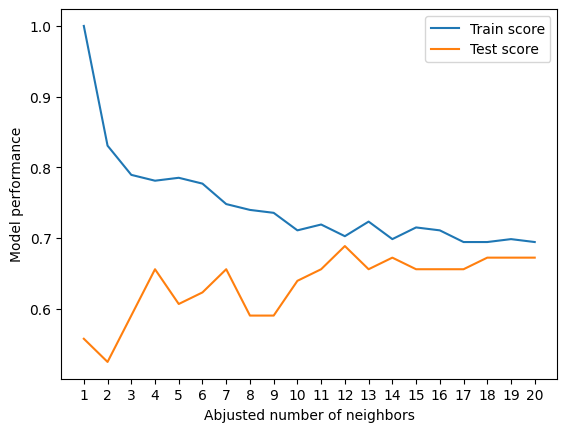

In [42]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Abjusted number of neighbors")
plt.ylabel("Model performance")
plt.legend()


In [43]:
print(f"Maximum performance of KNN in test data: {max(test_scores)*100:.2f}%")


Maximum performance of KNN in test data: 68.85%


## Ajustando modelos com RandomizedSearchCV
No exemplo de KNN ajustamos o hiperparâmetro manualmente, em vez de fazer isso com LogisticRegression e RandomForest, veremos como automatizar utilizando RandomizedSearchCV, basicamente esse recurso tenta várias combinações diferentes, avalia todas e salva a melhor.

In [51]:
logreg_grid = {"C":np.logspace(-4,4,20),
               "solver":["liblinear"]}

rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [58]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

rscv_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = logreg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

rscv_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [61]:
rscv_log_reg.best_params_

{'solver': 'liblinear', 'C': 11.288378916846883}

In [62]:
rscv_log_reg.score(X_test, y_test)

0.8360655737704918

In [63]:
rscv_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

rscv_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [64]:
rscv_rf.best_params_

{'n_estimators': 960,
 'min_samples_split': 6,
 'min_samples_leaf': 7,
 'max_depth': 5}

In [66]:
rscv_rf.score(X_test, y_test)

0.819672131147541

# Podemos fazer ainda ajustar os modelos com o GridSearchCV

In [67]:
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [68]:
gs_log_reg.best_params_


{'C': 11.288378916846883, 'solver': 'liblinear'}

In [69]:

gs_log_reg.score(X_test, y_test)

0.8360655737704918

O Scikit-Learn tem funcionalidades de avaliação de modelos, como por exemplo
 - Recall: quantos verdadeiros positivos o modelo encontrou, pode ser utilizado da seguinte forma: import sklearn.metrics sklearn.metrics.recall_score(y_test, y_pred)
 - Precisão: quantos positivos o modelo encontrou, pode ser utilizado da seguinte forma: import sklearn.metrics sklearn.metrics.precision_score(y_test, y_pred)
 - AUC: área sob a curva ROC, pode ser utilizado da seguinte forma: import sklearn.metrics sklearn.metrics.roc_auc_score(y_test, y_pred)
 - Matriz de confusão: matriz que mostra a quantidade de verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos, pode ser utilizado da seguinte forma: import sklearn.metrics sklearn.metrics.confusion_matrix(y_test, y_pred)